In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-classification-dataset-synthetic/README.md
/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv
/kaggle/input/fitness-classification-dataset-synthetic/dataset-metadata.json


In [3]:
df = pd.read_csv("/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [4]:
import numpy as np

print(df.isna().sum())  # Conta NaNs por coluna

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64


In [5]:
import numpy as np
import pandas as pd

# Seleciona apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number])

# Verifica valores infinitos
print(np.isinf(numeric_cols).sum())


age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
is_fit               0
dtype: int64


In [6]:
# Calcular a mediana das horas de sono (ignorando os nulos)
mediana_sono = df['sleep_hours'].median()
print(f"A mediana para imputação é: {mediana_sono}")

# Preencher os valores nulos com a mediana
df['sleep_hours'] = df['sleep_hours'].fillna(mediana_sono)

print(f"Valores nulos DEPOIS: {df['sleep_hours'].isnull().sum()}")

A mediana para imputação é: 7.5
Valores nulos DEPOIS: 0


In [7]:
df[numeric_cols.columns]

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
0,56,152,65,69.6,117.0,7.5,2.37,3.97,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,1
2,46,192,103,61.4,116.4,7.5,8.20,2.03,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1
...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,7.5,1.54,3.25,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [9]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.512250,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.440671,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.600000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.400000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


# Descobrir se uma pessoa é saudável 

## Verificar a proporção de Genero na base

In [10]:

print(f"\nPorcentagem de gênero:\n{(df['gender'].value_counts(normalize=True) * 100).round(2)}%")
print(f"\nQuantidade de homens e mulheres:\n{df['gender'].value_counts()}")


Porcentagem de gênero:
gender
F    51.5
M    48.5
Name: proportion, dtype: float64%

Quantidade de homens e mulheres:
gender
F    1030
M     970
Name: count, dtype: int64


Tem 1030 Mulheres para 970 homens, a base está equilibrada

# Verificar quantos homens são saudáveis e quantas mulheres são saudáveis

In [11]:
# Quantidade de mulheres fit
mulheres_fit = df[(df['gender'] == 'F') & (df['is_fit'] == 1)].shape[0]

# Quantidade de homens fit
homens_fit = df[(df['gender'] == 'M') & (df['is_fit'] == 1)].shape[0]

print(f"Mulheres saudaveis: {mulheres_fit}")
print(f"Homens saudáveis: {homens_fit}")

Mulheres saudaveis: 341
Homens saudáveis: 458


## Plotar o gráfico de relação

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

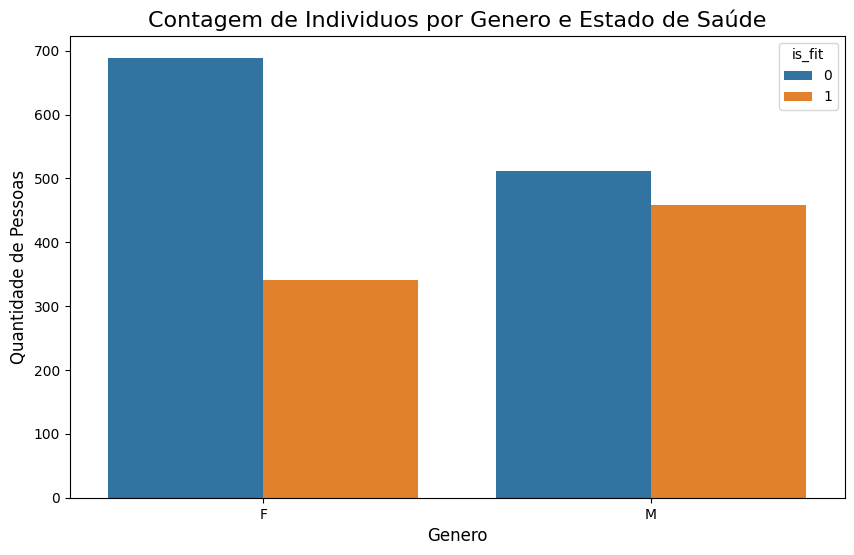

In [13]:
# Define o tamanho da figura para o gráfico
plt.figure(figsize=(10, 6))

# Cria o gráfico de contagem
sns.countplot(data=df, x='gender', hue='is_fit')

# Adiciona um título e rótolos para clareza
plt.title('Contagem de Individuos por Genero e Estado de Saúde', fontsize = 16)
plt.xlabel('Genero', fontsize = 12)
plt.ylabel('Quantidade de Pessoas', fontsize = 12)

# Exibir o gráfico
plt.show()

## Alterar os nomes das features no gráfico

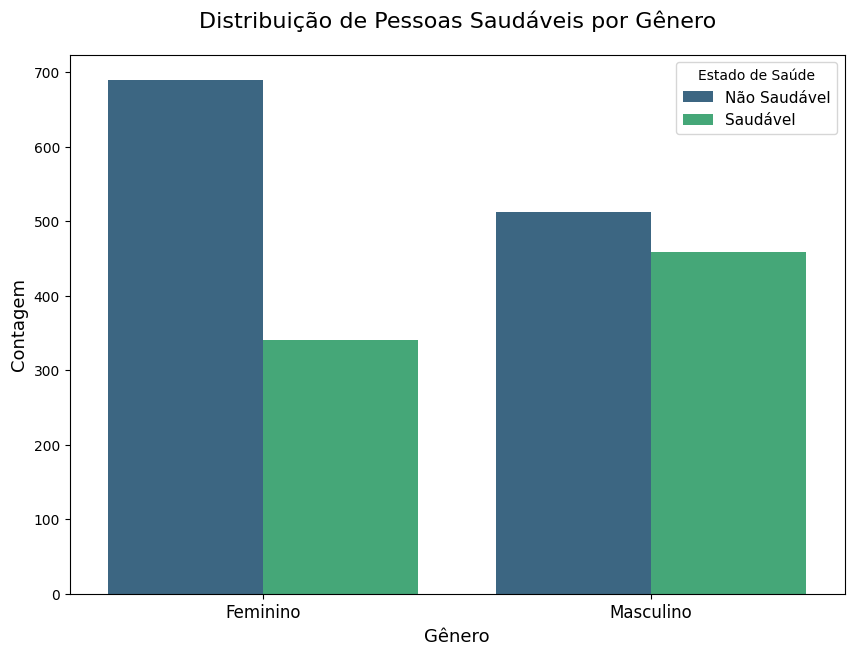

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 1. Crie o gráfico normalmente. O 'ax' é importante para podermos modificá-lo.
ax = sns.countplot(data=df, x='gender', hue='is_fit', palette='viridis')

# 2. Altere os rótulos do eixo X
# A ordem na lista deve corresponder à ordem das barras no gráfico ('Female' primeiro, depois 'Male')
ax.set_xticklabels(['Feminino', 'Masculino'], fontsize=12)

# 3. Altere os textos da legenda
# Pegamos os "handles" (as cores) e os "labels" (os textos '0', '1') atuais
handles, labels = ax.get_legend_handles_labels()
# Criamos uma nova legenda com os mesmos handles, mas com novos textos
ax.legend(handles, ['Não Saudável', 'Saudável'], title='Estado de Saúde', fontsize=11)

# --- Títulos e Rótulos ---
plt.title('Distribuição de Pessoas Saudáveis por Gênero', fontsize=16, pad=20)
plt.xlabel('Gênero', fontsize=13)
plt.ylabel('Contagem', fontsize=13)

plt.show()

## A função .map()

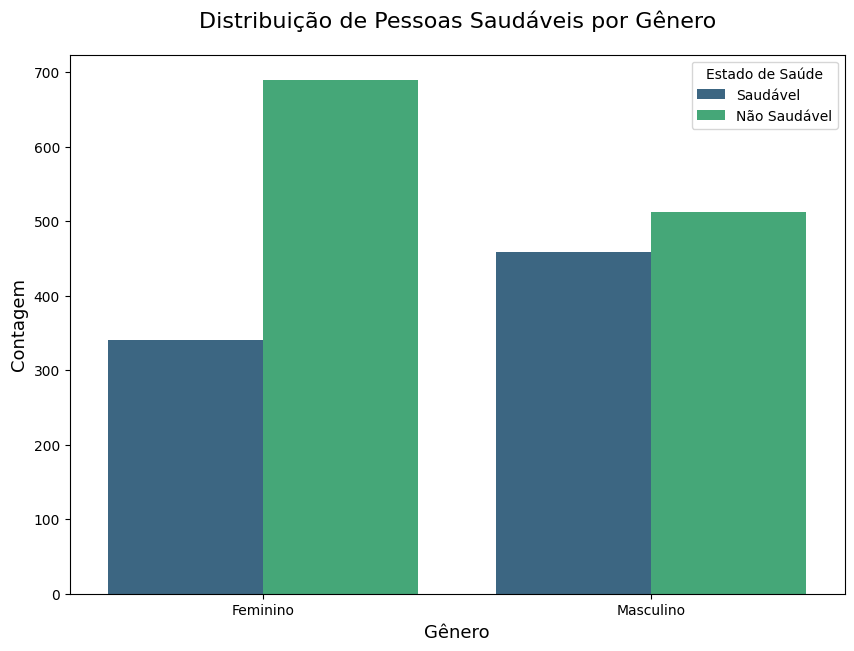

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crie uma cópia do DataFrame para a visualização, é uma boa prática
df_plot = df.copy()

# 2. Crie os "dicionários de tradução"
gender_map = {'F': 'Feminino', 'M': 'Masculino'}
fit_map = {0: 'Não Saudável', 1: 'Saudável'}

# 3. Aplique as traduções usando .map()
df_plot['gender'] = df_plot['gender'].map(gender_map)
df_plot['is_fit'] = df_plot['is_fit'].map(fit_map)

# 4. Agora, crie o gráfico. Veja como o código fica mais limpo!
# O Seaborn vai usar os novos textos automaticamente.
plt.figure(figsize=(10, 7))
sns.countplot(data=df_plot, x='gender', hue='is_fit', palette='viridis')

# --- Títulos e Rótulos ---
plt.title('Distribuição de Pessoas Saudáveis por Gênero', fontsize=16, pad=20)
plt.xlabel('Gênero', fontsize=13)
plt.ylabel('Contagem', fontsize=13)
plt.legend(title='Estado de Saúde') # A legenda já pega os nomes corretos!

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


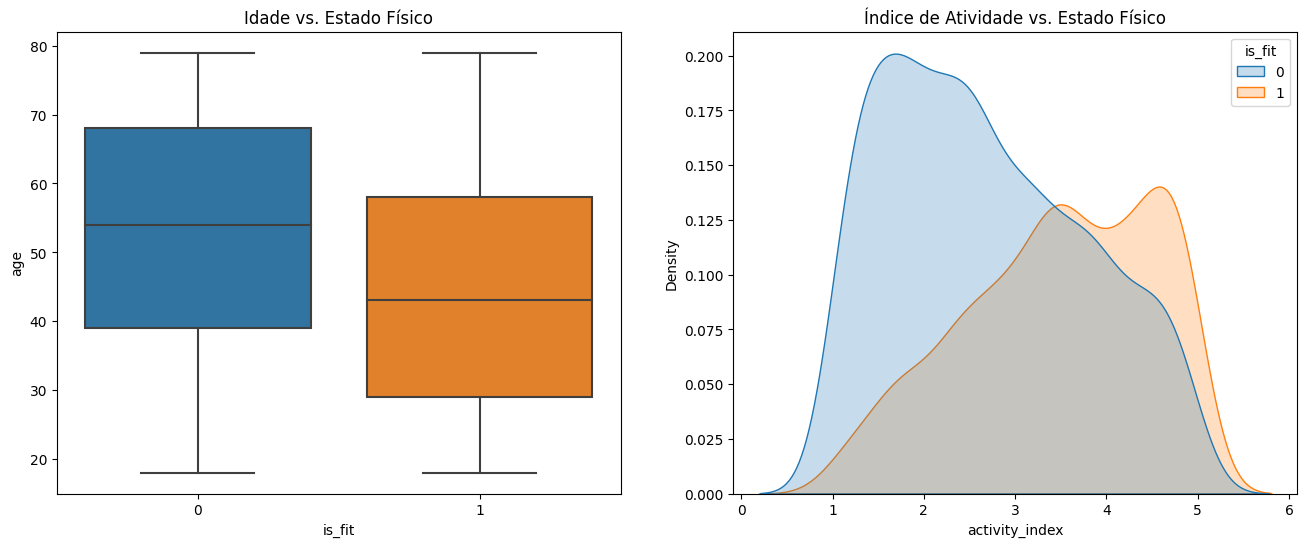

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo para 'age' e 'activity_index'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], data=df, x='is_fit', y='age')
axes[0].set_title('Idade vs. Estado Físico')

sns.kdeplot(ax=axes[1], data=df, x='activity_index', hue='is_fit', fill=True)
axes[1].set_title('Índice de Atividade vs. Estado Físico')

plt.show()

# Criar a feature IMC, importante parametro para análise

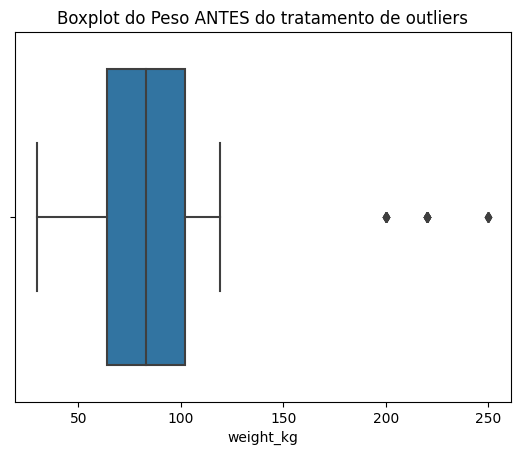

Limite inferior: 7.00, Limite superior: 159.00


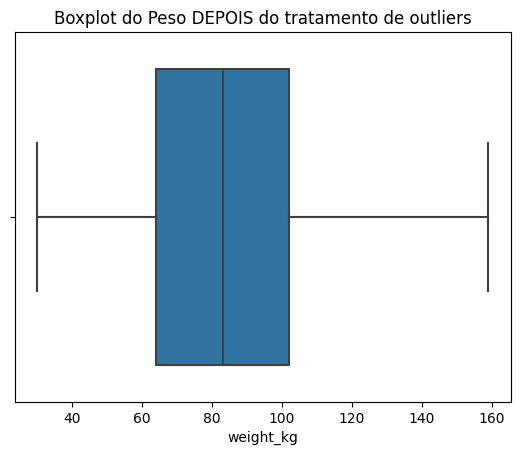

In [17]:
# Visualizando o outlier com um boxplot
sns.boxplot(x=df['weight_kg'])
plt.title('Boxplot do Peso ANTES do tratamento de outliers')
plt.show()

# Calcular Q1, Q3 e IQR
Q1 = df['weight_kg'].quantile(0.25)
Q3 = df['weight_kg'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite inferior: {limite_inferior:.2f}, Limite superior: {limite_superior:.2f}")

# Tratar os outliers fazendo o "capping" (limitando os valores)
# Valores abaixo do limite inferior se tornam o limite inferior
# Valores acima do limite superior se tornam o limite superior
df['weight_kg'] = df['weight_kg'].clip(lower=limite_inferior, upper=limite_superior)

# Visualizando o resultado
sns.boxplot(x=df['weight_kg'])
plt.title('Boxplot do Peso DEPOIS do tratamento de outliers')
plt.show()

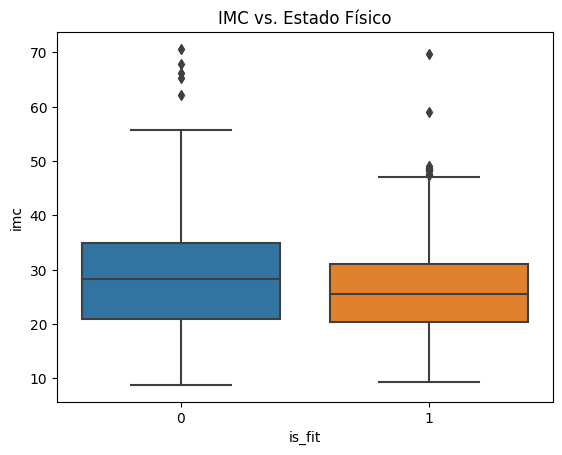

In [18]:
# O IMC é calculado em metros, por isso temos que transformar cm em metro
df['imc'] = df['weight_kg'] / ((df['height_cm']/100)**2)

# Analise o ICM
sns.boxplot(data=df, x='is_fit', y='imc')
plt.title('IMC vs. Estado Físico')
plt.show()

## Criar os gráfico de dispersão para cada par de variáveis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

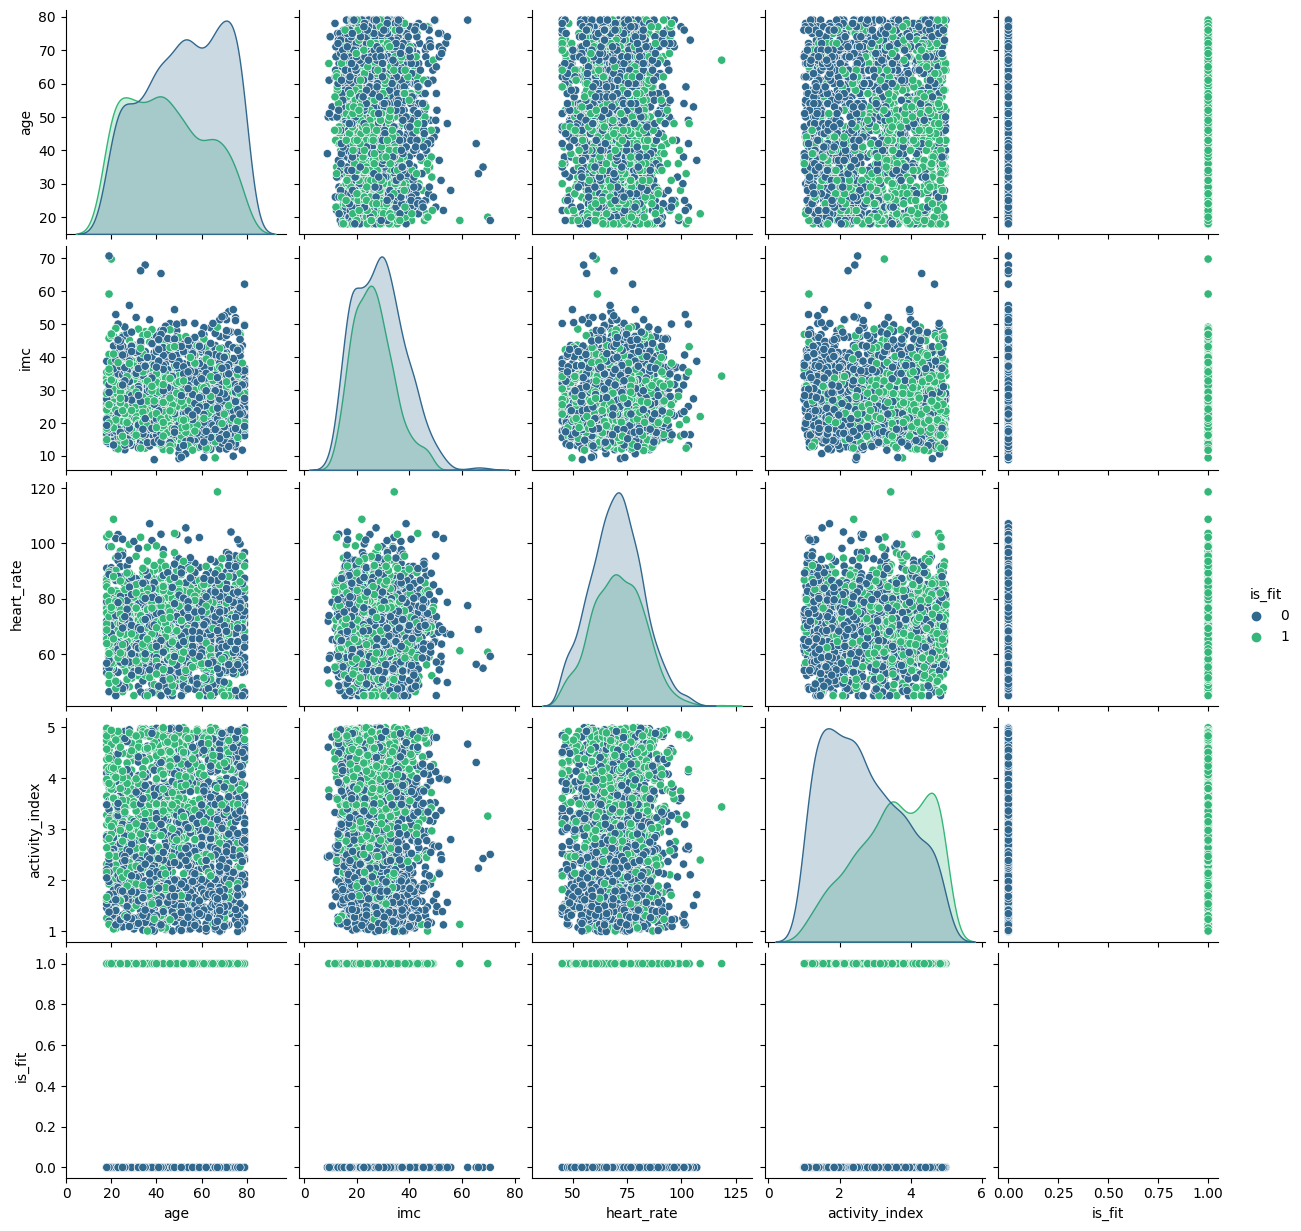

In [19]:
# Use vars para selecionar as features mais importantes e não poluir o gráfico
features_interesse = ['age', 'imc', 'heart_rate', 'activity_index', 'is_fit']

# O 'hue' colore os pontos por 'is_fit'
sns.pairplot(df, hue='is_fit', vars=features_interesse, palette='viridis')
plt.show()

1. Podemos analisar que as pessoas mais novas tem a tendencias de serem mais saudáveis, já as mais velhas tendem a ser menos saudáveis.
2. As pessoas saudáveis tem o IMC mais baixo.
3. Pessoas com mais atividade fisica são propensa a serem saudáveis

## Calcular a quantidade de pessoas por genero que tem pressão alto, normal e baixa

### Renomear a feature blood_pressures para pressão_sistolica

In [20]:
if 'blood_pressure' in df.columns:
        df.rename(columns={'blood_pressure': 'pressao_sistolica'}, inplace=True)
        print("Coluna renomeada para 'pressao_sistolica'")

Coluna renomeada para 'pressao_sistolica'


### Criar os limites para a classificação

In [21]:
# Limites (bins) para a classificação
# -inf a 69.9 -> Baixa
# 70 a 100    -> Normal
# 100.1 a +inf -> Alta
limites = [  0,      # Início
    119.9,  # Fim do 'Normal' (< 120)
    129.9,  # Fim da 'Elevada' (120-129)
    139.9,  # Fim do 'Estágio 1' (130-139)
    180,    # Fim do 'Estágio 2' (140-180)
    np.inf  # Acima de 180 é 'Crise Hipertensiva'
]

# Rótulos para cada faixa
rotulos = [
    'Normal',
    'Elevada',
    'Hipertensão Estágio 1',
    'Hipertensão Estágio 2',
    'Crise Hipertensiva']

### Criar a nova coluna de classificação

In [22]:
df['classificacao_pressao'] = pd.cut(df['pressao_sistolica'],
                                    bins=limites,
                                    labels=rotulos,
                                    right=True)

print("\nColuna 'classificacao_sistolica' criada com sucesso.")


Coluna 'classificacao_sistolica' criada com sucesso.


### Agregação dos dados (Contagem)

In [23]:
contagem_classificada = pd.crosstab(df['gender'], df['classificacao_pressao'])
contagem_classificada.head()

classificacao_pressao,Normal,Elevada,Hipertensão Estágio 1,Hipertensão Estágio 2
gender,,,,
F,510,268,161,91
M,489,241,161,79


1. 119.9,  # Fim do 'Normal' (< 120)
2. 129.9,  # Fim da 'Elevada' (120-129)
3. 139.9,  # Fim do 'Estágio 1' (130-139)
4.  180,    # Fim do 'Estágio 2' (140-180)
5. np.inf  # Acima de 180 é 'Crise Hipertensiva'

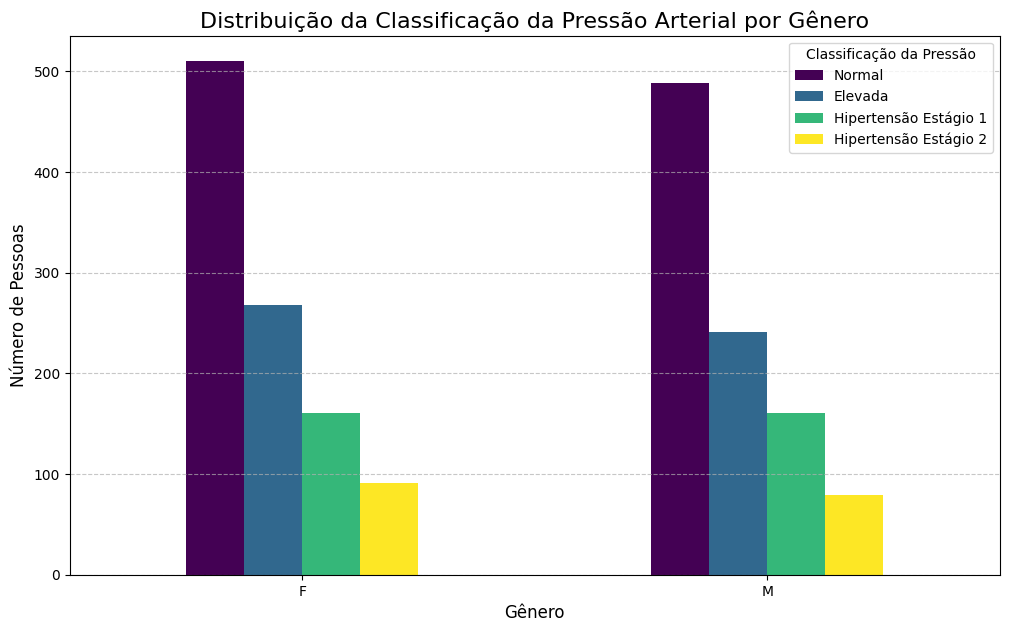

In [24]:
contagem_classificada.plot(kind='bar',
                           figsize=(12, 7),
                           colormap='viridis',
                           stacked=False)

plt.title('Distribuição da Classificação da Pressão Arterial por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Classificação da Pressão')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pode-se dizer que a proporção do estado de pressão entre homens e mulheres são parecidos na base de dados

## Verificar se a classificação do estado de pressão tem relação ao nivel de saúde da pessoa

Contagem: Pessoas com Hipertensão que são 'Saudáveis' vs ' Não Saudáveis'
estado_fisico          Não saudável  Saudável
classificacao_pressao                        
Normal                          575       424
Elevada                         314       195
Hipertensão Estágio 1           198       124
Hipertensão Estágio 2           114        56


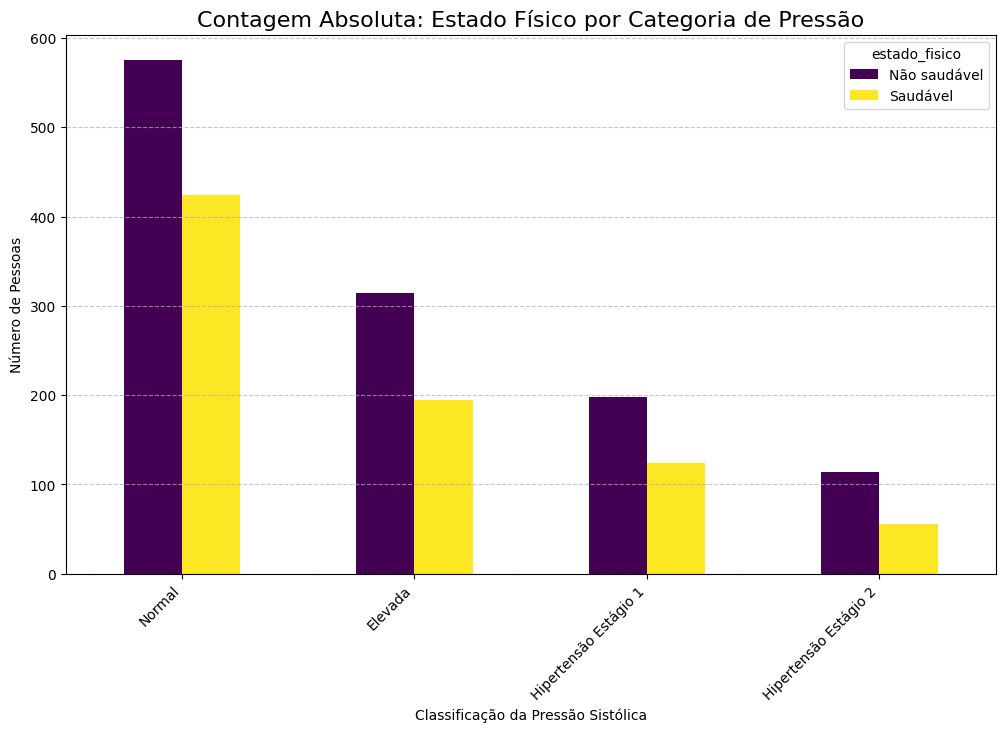

In [25]:
# Lembre-se que is_fit pode ser 0 e 1. Vamos mapear para textos para o gráfico ficar mais claro.
df['estado_fisico'] = df['is_fit'].map({0: 'Não saudável', 1: 'Saudável'})

# 1. Criar a tabela de contingência para cruzar as duas variáveis
tabela_cruzada = pd.crosstab(df['classificacao_pressao'], df['estado_fisico'])

print(f"Contagem: Pessoas com Hipertensão que são 'Saudáveis' vs ' Não Saudáveis'")
print(tabela_cruzada)

# 2. Visualizar a contagem absoluta
tabela_cruzada.plot(kind='bar', figsize=(12, 7), colormap='viridis', stacked=False)
plt.title('Contagem Absoluta: Estado Físico por Categoria de Pressão', fontsize=16)
plt.ylabel('Número de Pessoas')
plt.xlabel('Classificação da Pressão Sistólica')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Proporção (%): Dentro de cada categoria de pressão, a distribuição de 'Saudável' vs 'Não Saudável'
estado_fisico          Não saudável  Saudável
classificacao_pressao                        
Normal                        57.56     42.44
Elevada                       61.69     38.31
Hipertensão Estágio 1         61.49     38.51
Hipertensão Estágio 2         67.06     32.94


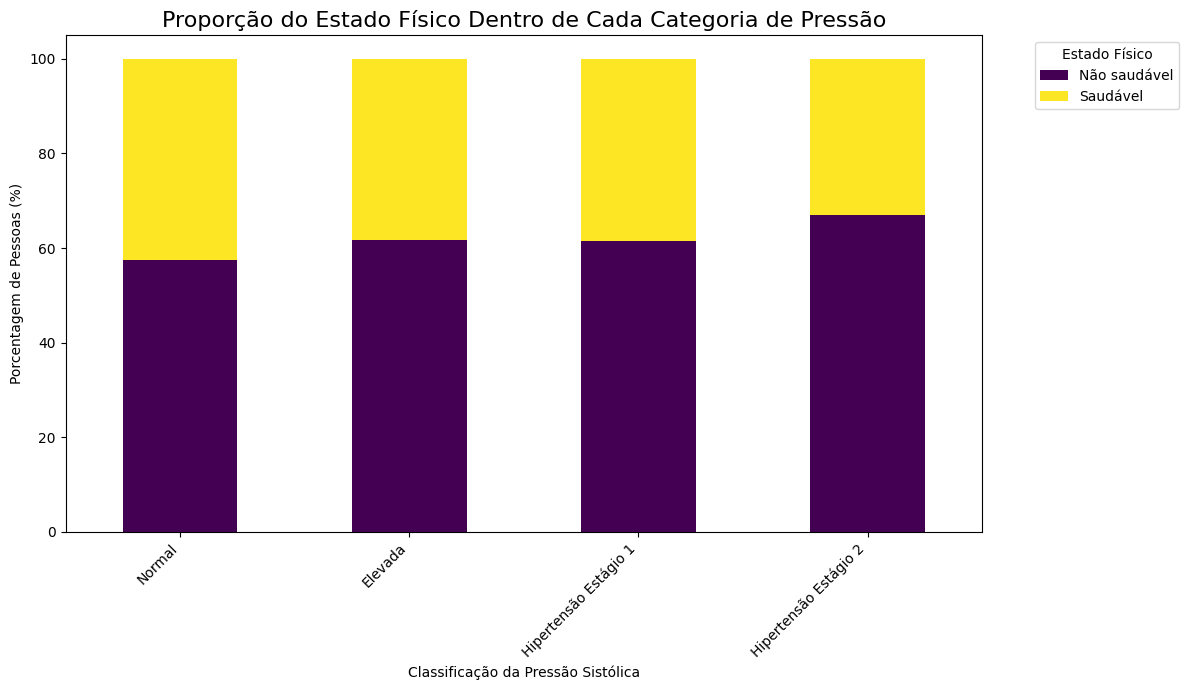

In [26]:
# 1. Criar a tabela de contingência normalizada por linha (porcentagens)
tabela_proporcoes = pd.crosstab(df['classificacao_pressao'], df['estado_fisico'], normalize='index')

# Multiplicar por 100 para ver como porcentagem e arredondar
tabela_proporcoes = (tabela_proporcoes * 100).round(2)

print("\nProporção (%): Dentro de cada categoria de pressão, a distribuição de 'Saudável' vs 'Não Saudável'")
print(tabela_proporcoes)


# 2. Visualizar as proporções com um gráfico de barras empilhadas 100%
tabela_proporcoes.plot(kind='bar',
                       stacked=True,  # Empilhado para mostrar a proporção de 100%
                       figsize=(12, 7),
                       colormap='viridis')

plt.title('Proporção do Estado Físico Dentro de Cada Categoria de Pressão', fontsize=16)
plt.ylabel('Porcentagem de Pessoas (%)')
plt.xlabel('Classificação da Pressão Sistólica')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado Físico')
# Colocar a legenda fora do gráfico
plt.legend(title='Estado Físico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para a legenda caber
plt.show()

## Verificar a relação com a qualidade da alimentação

In [27]:
# --- Certifique-se de que a coluna 'estado_fisico' existe ---
if 'estado_fisico' not in df.columns:
    df['estado_fisico'] = df['is_fit'].map({0: 'Não saudável', 1: 'Saudável'})

# 1. Tabela de proporções: Qual a % de 'Saudável'/'Não Saudável' para cada nível de nutrição?
tabela_nutricao_fit = pd.crosstab(df['nutrition_quality'], df['estado_fisico'], normalize='index')
tabela_proporcoes_nutricao = (tabela_nutricao_fit * 100).round(2)

print("Proporção (%): Estado Físico por Qualidade da Nutrição")
print(tabela_proporcoes_nutricao)

Proporção (%): Estado Físico por Qualidade da Nutrição
estado_fisico      Não saudável  Saudável
nutrition_quality                        
0.00                     100.00      0.00
0.01                     100.00      0.00
0.03                     100.00      0.00
0.04                     100.00      0.00
0.06                     100.00      0.00
...                         ...       ...
9.95                      33.33     66.67
9.96                       0.00    100.00
9.97                       0.00    100.00
9.98                     100.00      0.00
10.00                     66.67     33.33

[866 rows x 2 columns]


In [28]:
# Coloque os valores '9.98' e '10.00' dentro de uma lista [ ]
df[df['nutrition_quality'].isin([9.98, 10.00])]

,age,height_cm,weight_kg,heart_rate,pressao_sistolica,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit,imc,classificacao_pressao,estado_fisico
467,52,171,54,53.8,109.5,6.8,10.00,1.30,yes,M,0,18.467221,Normal,Não saudável
609,64,173,103,79.9,111.2,5.7,10.00,4.99,0,M,1,34.414782,Normal,Saudável
666,48,163,104,84.5,108.3,6.2,9.98,2.57,yes,M,0,39.143363,Normal,Não saudável
1455,32,196,116,78.2,109.5,7.5,10.00,1.60,yes,M,0,30.195752,Normal,Não saudável


Pessoas que tem uma alimentação de boa qualidade, tende a ser mais saudáveis, mas é necessário ver se eles tem o hábito de fumar

## Verificar a relação de fumantes com pessoas saudáveis

Dados de tabagismo unificados com sucesso!
Proporção (%): Estado Físico por Status de Tabagismo ('smokes')
estado_fisico  Não saudável  Saudável
smokes                               
No                    44.98     55.02
Yes                   76.65     23.35


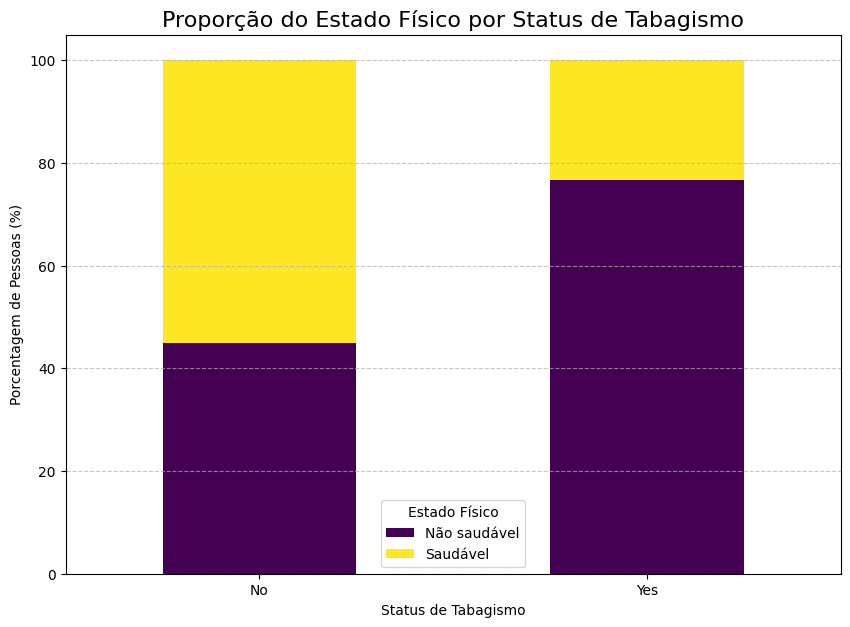

In [29]:
# --- Pré-requisitos ---
# Garanta que a coluna 'estado_fisico' (Fit/Não Fit) existe.
if 'estado_fisico' not in df.columns:
    df['estado_fisico'] = df['is_fit'].map({0: 'Não Saudável', 1: 'Saudáel'})

# --- ATENÇÃO: Verifique o nome da sua coluna de tabagismo ---
# Se o nome da sua coluna for 'smoker', 'fuma', etc., altere a linha abaixo.
coluna_tabagismo = 'smokes' # <--- ALTERE AQUI SE NECESSÁRIO

# Dicionário de mapeamento
mapa_fumantes = {1: 'Yes', 'yes': 'Yes', 0: 'No', 'no': 'No'}

# Aplicar o mapa para limpar a coluna
df[coluna_tabagismo] = df[coluna_tabagismo].map(mapa_fumantes)

print("Dados de tabagismo unificados com sucesso!")


# Verificando se a coluna existe antes de prosseguir
if coluna_tabagismo in df.columns:
    # 1. Tabela de proporções: Qual a % de 'Fit'/'Não Fit' entre fumantes e não fumantes?
    tabela_fumantes_fit = pd.crosstab(df[coluna_tabagismo], df['estado_fisico'], normalize='index')
    tabela_proporcoes_fumantes = (tabela_fumantes_fit * 100).round(2)

    print(f"Proporção (%): Estado Físico por Status de Tabagismo ('{coluna_tabagismo}')")
    print(tabela_proporcoes_fumantes)

    # 2. Visualização com gráfico de barras 100% empilhado
    tabela_proporcoes_fumantes.plot(kind='bar',
                                    stacked=True,
                                    figsize=(10, 7),
                                    colormap='viridis')

    plt.title('Proporção do Estado Físico por Status de Tabagismo', fontsize=16)
    plt.ylabel('Porcentagem de Pessoas (%)')
    plt.xlabel('Status de Tabagismo')
    plt.xticks(rotation=0)
    plt.legend(title='Estado Físico')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print(f"ERRO: A coluna '{coluna_tabagismo}' não foi encontrada no DataFrame.")
    print("Por favor, verifique o nome da coluna que indica o status de tabagismo e atualize o script.")

Sabe-se que fumar é um parametro importante para identificar se uma pessoal é saudável

## Verificar a relação de tabagismo por gênero

In [30]:
# --- Pré-requisitos (garantir que as colunas estão prontas) ---
if 'estado_fisico' not in df.columns:
    df['estado_fisico'] = df['is_fit'].map({0: 'Não Saudável', 1: 'Saudável'})
coluna_tabagismo = 'smokes' # Certifique-se que esta coluna está limpa ('Yes'/'No')


# Usamos groupby para agrupar por gênero E status de tabagismo
# value_counts(normalize=True) calcula a porcentagem dentro de cada um desses 4 grupos
analise_por_genero = df.groupby(['gender', coluna_tabagismo])['estado_fisico'].value_counts(normalize=True)

# Multiplicar por 100 para ver como porcentagem
analise_por_genero_pct = (analise_por_genero * 100).round(2)

print("Proporção (%) do Estado Físico, segmentado por Gênero e Tabagismo:")
print(analise_por_genero_pct)

Proporção (%) do Estado Físico, segmentado por Gênero e Tabagismo:
gender  smokes  estado_fisico
F       No      Não saudável     52.90
                Saudável         47.10
        Yes     Não saudável     82.02
                Saudável         17.98
M       No      Saudável         65.33
                Não saudável     34.67
        Yes     Não saudável     71.27
                Saudável         28.73
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


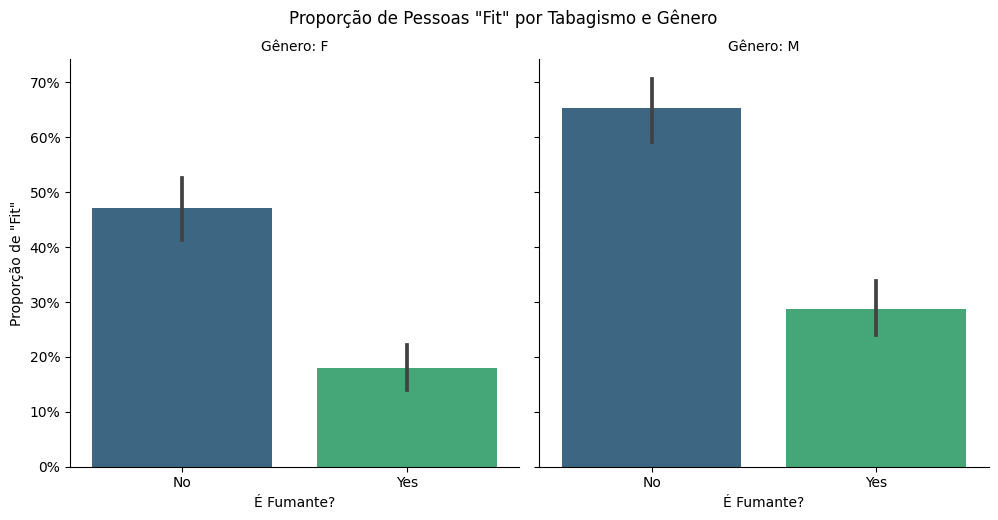

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# O catplot é ideal para criar sub-gráficos baseados em uma categoria
# kind='bar' calcula a proporção de 'Fit' para cada barra
# col='gender' cria uma coluna de gráficos separada para cada gênero
g = sns.catplot(data=df,
                x=coluna_tabagismo,
                y='is_fit', # Usamos is_fit (0/1) pois a média de 0s e 1s é a proporção de 1s (Fit)
                col='gender',
                kind='bar',
                palette='viridis',
                order=['No', 'Yes']) # Garante a ordem correta no eixo X

# --- Melhorando os Títulos e Rótulos ---
g.fig.suptitle('Proporção de Pessoas "Fit" por Tabagismo e Gênero', y=1.03)
g.set_axis_labels("É Fumante?", 'Proporção de "Fit"')
g.set_titles("Gênero: {col_name}")

# Formatando o eixo Y para mostrar porcentagem
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.show()

A lógica de não fumantes sendo mais saudáveis entre homens e mulheres, ainda mantem igual

## Analisar o que é mais prejudicial (Alimentação vs Tabagismo)

In [32]:
# --- Pré-requisitos (garantir que as colunas estão prontas) ---
# Certifique-se que a coluna 'smokes' está limpa ('Yes'/'No')
# Certifique-se que a coluna 'estado_fisico' existe ('Fit'/'Não Fit')
# Assumindo que a coluna de nutrição se chama 'nutrition_quality'

# Agrupando por AMBAS as colunas para ver o efeito combinado
analise_combinada = df.groupby(['nutrition_quality', 'smokes'])['estado_fisico'].value_counts(normalize=True)

# Formatando para visualização
analise_combinada_pct = (analise_combinada * 100).round(2)

print("Proporção (%) do Estado Físico por Nutrição e Tabagismo:")
print(analise_combinada_pct)

Proporção (%) do Estado Físico por Nutrição e Tabagismo:
nutrition_quality  smokes  estado_fisico
0.00               Yes     Não saudável     100.0
0.01               Yes     Não saudável     100.0
0.03               No      Não saudável     100.0
0.04               Yes     Não saudável     100.0
0.07               No      Saudável         100.0
                                            ...  
9.95               Yes     Não saudável      50.0
                           Saudável          50.0
9.96               Yes     Saudável         100.0
9.98               Yes     Não saudável     100.0
10.00              Yes     Não saudável     100.0
Name: proportion, Length: 1043, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Coluna 'classificacao_nutricao' criada com sucesso.

Contagem de pessoas em cada nova categoria de nutrição:
classificacao_nutricao
Ruim     809
Média    597
Boa      594
Name: count, dtype: int64

Gerando o gráfico comparativo corrigido...


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


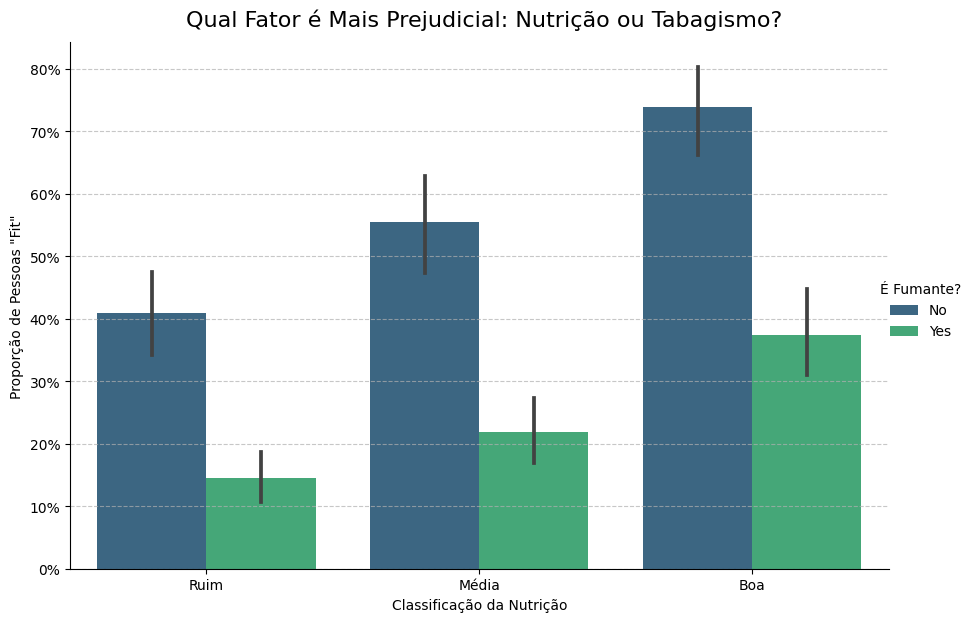

In [33]:
# ==============================================================================
# 1. ENGENHARIA DE FEATURE: CATEGORIZAR 'nutrition_quality'
# ==============================================================================
# Verificando o tipo de dado para garantir que é numérico
if df['nutrition_quality'].dtype == 'object':
    df['nutrition_quality'] = pd.to_numeric(df['nutrition_quality'], errors='coerce')

# Definindo os limites e rótulos para a nova classificação
# Usamos -1 como ponto de partida para incluir o 0
limites_nutricao = [-1, 4, 7, 10]
rotulos_nutricao = ['Ruim', 'Média', 'Boa']

# Criando a nova coluna categórica usando pd.cut
df['classificacao_nutricao'] = pd.cut(df['nutrition_quality'],
                                      bins=limites_nutricao,
                                      labels=rotulos_nutricao,
                                      right=True)

print("Coluna 'classificacao_nutricao' criada com sucesso.")
print("\nContagem de pessoas em cada nova categoria de nutrição:")
print(df['classificacao_nutricao'].value_counts())


# ==============================================================================
# 2. ANÁLISE VISUAL CORRIGIDA: Nutrição vs. Tabagismo
# ==============================================================================
print("\nGerando o gráfico comparativo corrigido...")

# Usamos a nova coluna 'classificacao_nutricao' no eixo X
g = sns.catplot(data=df,
                x='classificacao_nutricao', # <--- MUDANÇA PRINCIPAL AQUI
                y='is_fit',
                hue='smokes',
                kind='bar',
                palette='viridis',
                order=['Ruim', 'Média', 'Boa'], # Usando a ordem das nossas novas categorias
                height=6,
                aspect=1.5)

# --- Melhorando os Títulos e Rótulos ---
g.fig.suptitle('Qual Fator é Mais Prejudicial: Nutrição ou Tabagismo?', y=1.03, fontsize=16)
g.set_axis_labels("Classificação da Nutrição", 'Proporção de Pessoas "Fit"')
g.legend.set_title("É Fumante?")

# Formatando o eixo Y para mostrar porcentagem
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ainda as pessoas que fumam são menos saudáveis

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

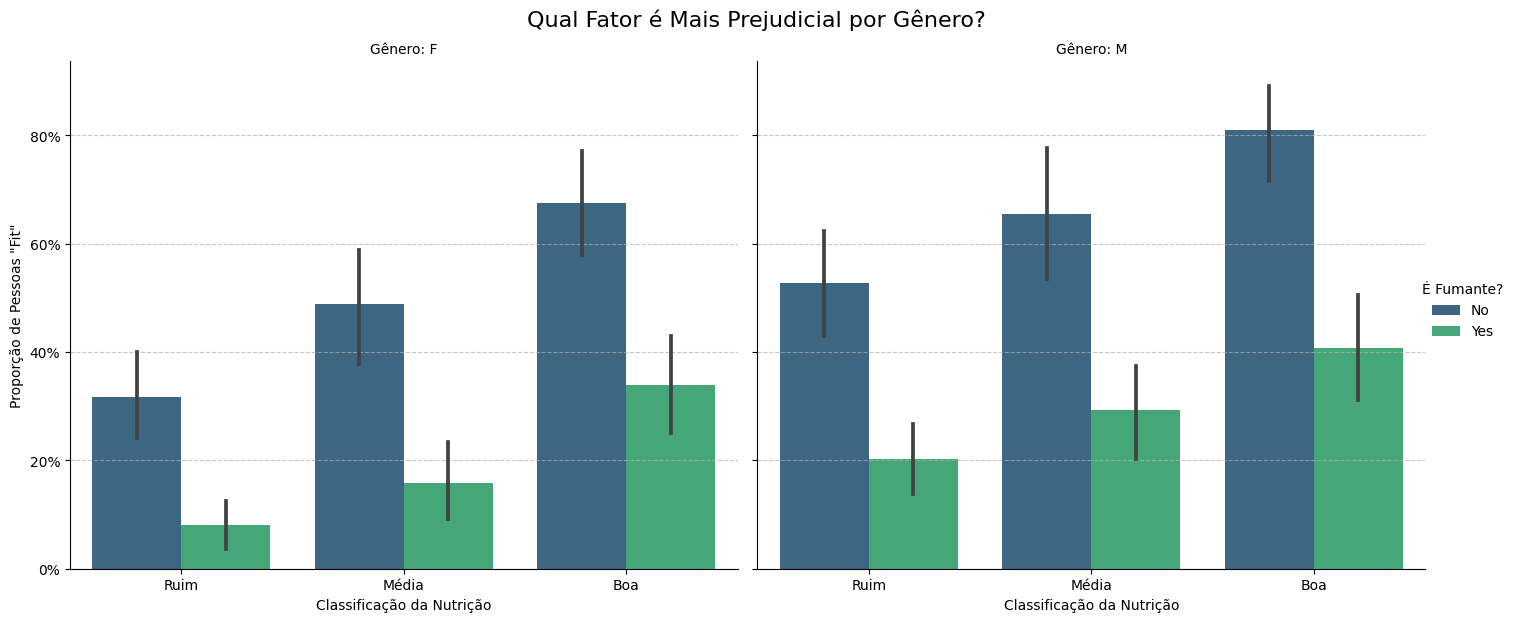

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Pré-requisitos (garantir que as colunas existem) ---
# Se qualquer uma dessas colunas não existir, rode os scripts anteriores primeiro.
required_columns = ['gender', 'smokes', 'classificacao_nutricao', 'is_fit']
if not all(col in df.columns for col in required_columns):
    print("ERRO: Uma das colunas necessárias não foi encontrada. Rode os scripts de preparação anteriores.")
else:
    # O catplot agora terá o parâmetro 'col="gender"' para separar os gráficos
    g = sns.catplot(data=df,
                    x='classificacao_nutricao',
                    y='is_fit',
                    hue='smokes',
                    col='gender', # <--- AQUI ESTÁ A MÁGICA: CRIA UMA COLUNA DE GRÁFICOS POR GÊNERO
                    kind='bar',
                    palette='viridis',
                    order=['Ruim', 'Média', 'Boa'],
                    height=6,
                    aspect=1.2)

    # --- Melhorando os Títulos e Rótulos ---
    g.fig.suptitle('Qual Fator é Mais Prejudicial por Gênero?', y=1.03, fontsize=16)
    g.set_axis_labels("Classificação da Nutrição", 'Proporção de Pessoas "Fit"')
    g.set_titles("Gênero: {col_name}")
    g.legend.set_title("É Fumante?")

    # Formatando o eixo Y para mostrar porcentagem
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

## Iniciando a escolha e testes dos melhores modelos de machine learning para esse problema

### Mapear as colunas numericas

In [35]:
# --- Mapeando as colunas numéricas ---
# np.number inclui todos os tipos de omteorps e floats (int64, float64, etc.)
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

# --- Mapeando as colunas categóricas ---
# 'object' é o tipo de dado para strings,'category'e 'bool' tambem são categóricos.
colunas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# --- Exibindo os resultados ---
print("="*50)
print("COLUNAS NUMÉRICAS IDENTIFICADAS:")
print(colunas_numericas)

print("\n" + "="*50)
print("COLUNAS CATEGÓRICAS IDENTIFICADAS:")
print(colunas_categoricas)

COLUNAS NUMÉRICAS IDENTIFICADAS:
['age', 'height_cm', 'weight_kg', 'heart_rate', 'pressao_sistolica', 'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit', 'imc']

COLUNAS CATEGÓRICAS IDENTIFICADAS:
['smokes', 'gender', 'classificacao_pressao', 'estado_fisico', 'classificacao_nutricao']


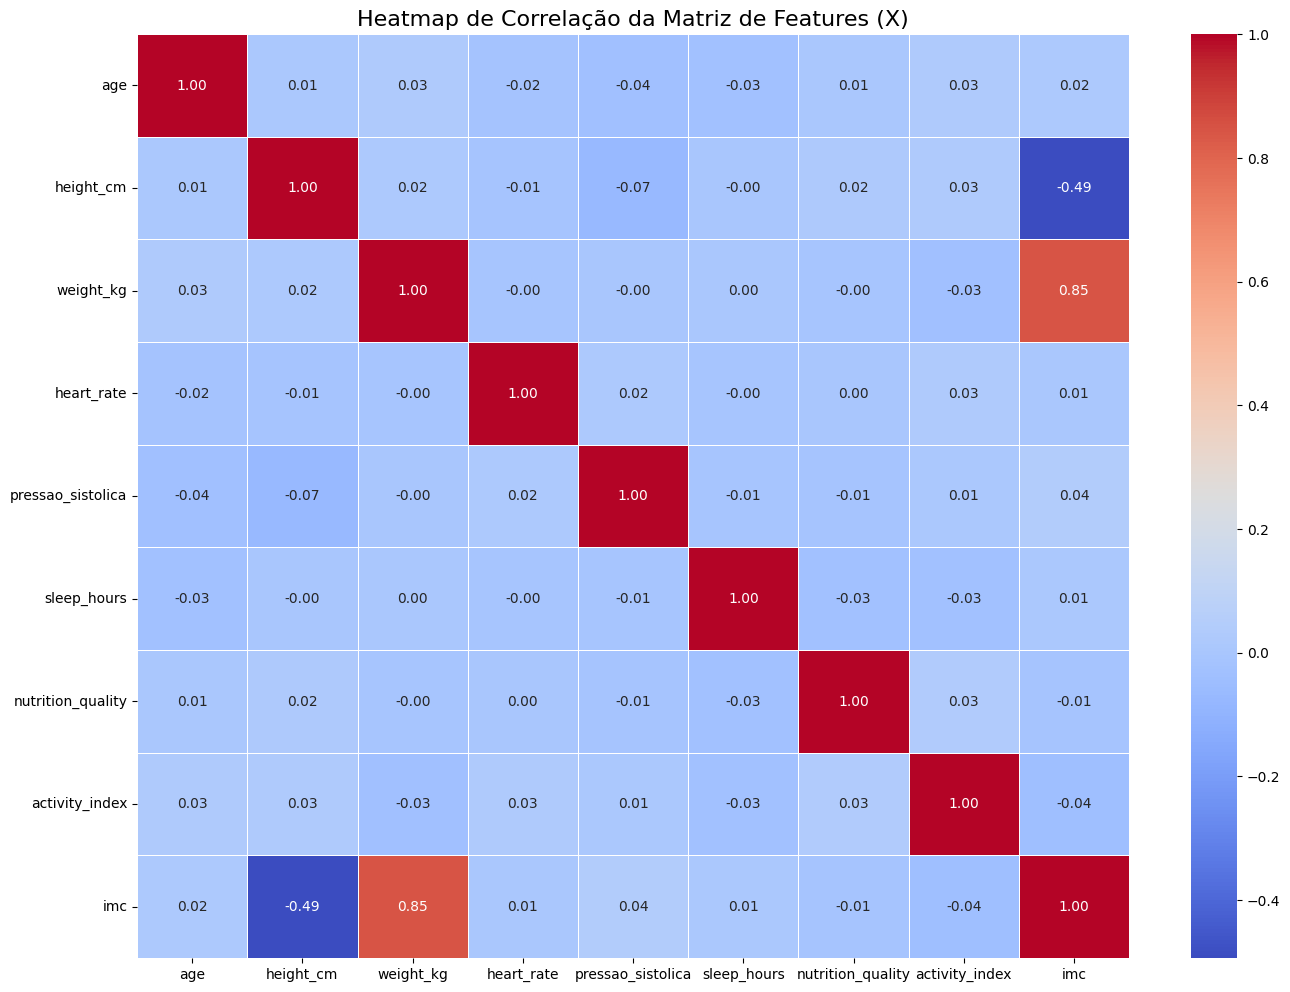

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'X' é a sua matriz de features já definida (sem as colunas 'is_fit' e 'estado_fisico')

# Começamos com o DataFrame inteiro e removemos as colunas que não podem estar aqui
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- 1. Selecionar Apenas as Colunas Numéricas de X ---
# Usamos o método que já conhecemos para garantir que só temos números
colunas_numericas_X = X.select_dtypes(include=np.number).columns.tolist()
X_numeric = X[colunas_numericas_X]


# --- 2. Calcular a Matriz de Correlação ---
matriz_correlacao_X = X_numeric.corr()


# --- 3. Plotar o Heatmap ---
plt.figure(figsize=(16, 12)) # Aumentando o tamanho para melhor visualização

sns.heatmap(matriz_correlacao_X,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)

plt.title('Heatmap de Correlação da Matriz de Features (X)', fontsize=16)
plt.show()

Em um conjunto de dados real sobre saúde, esperaríamos ver correlações, mesmo que fracas. Por exemplo, a idade geralmente tem uma correlação positiva com a pressão sistólica. Um maior índice de atividade geralmente tem uma correlação negativa mais forte com o IMC. O fato de esses valores serem quase perfeitamente zero é um grande sinal de alerta.

## Random Forest

Iniciando o pré-processamento para o modelo Random Forest...
One-Hot Encoding concluído.
Dados divididos: 1400 para treino, 600 para teste.
Escalonamento das features numéricas concluído.

TREINANDO E AVALIANDO O RANDOM FOREST
Acurácia do Random Forest: 0.7550

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.76      0.86      0.81       360
    Saudável       0.74      0.60      0.66       240

    accuracy                           0.76       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.75      0.76      0.75       600

Matriz de Confusão:


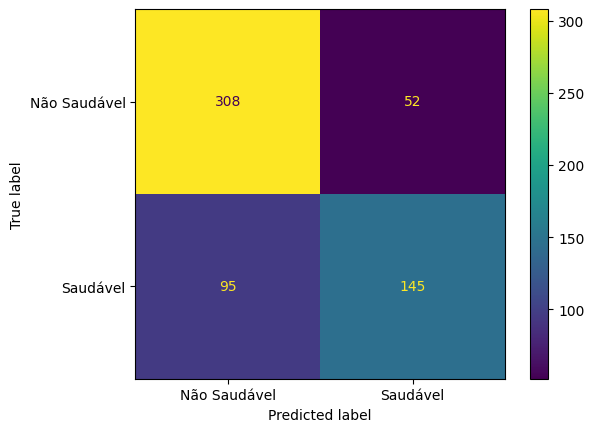

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# ==============================================================================
# 1. PREPARAÇÃO FINAL DOS DADOS (PRÉ-PROCESSAMENTO)
# ==============================================================================
print("Iniciando o pré-processamento para o modelo Random Forest...")

# --- Separar Features (X) e Alvo (y) ---
y = df['is_fit']
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- Codificação de Variáveis Categóricas (One-Hot Encoding) ---
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True, dtype=int)
print("One-Hot Encoding concluído.")

# ==============================================================================
# 2. DIVISÃO EM DADOS DE TREINO E TESTE
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

# ==============================================================================
# 3. ESCALONAMENTO DAS FEATURES NUMÉRICAS
# ==============================================================================
colunas_numericas = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])
print("Escalonamento das features numéricas concluído.")

# ==============================================================================
# 4. MODELO: RANDOM FOREST
# ==============================================================================
print("\n" + "="*50)
print("TREINANDO E AVALIANDO O RANDOM FOREST")
print("="*50)

# --- Treinamento ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- Previsão e Avaliação ---
y_pred_rf = rf_model.predict(X_test)

print(f"Acurácia do Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Saudável', 'Saudável']))

# --- Matriz de Confusão ---
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=['Não Saudável', 'Saudável'])
plt.show()




FEATURES MAIS IMPORTANTES (RANDOM FOREST)


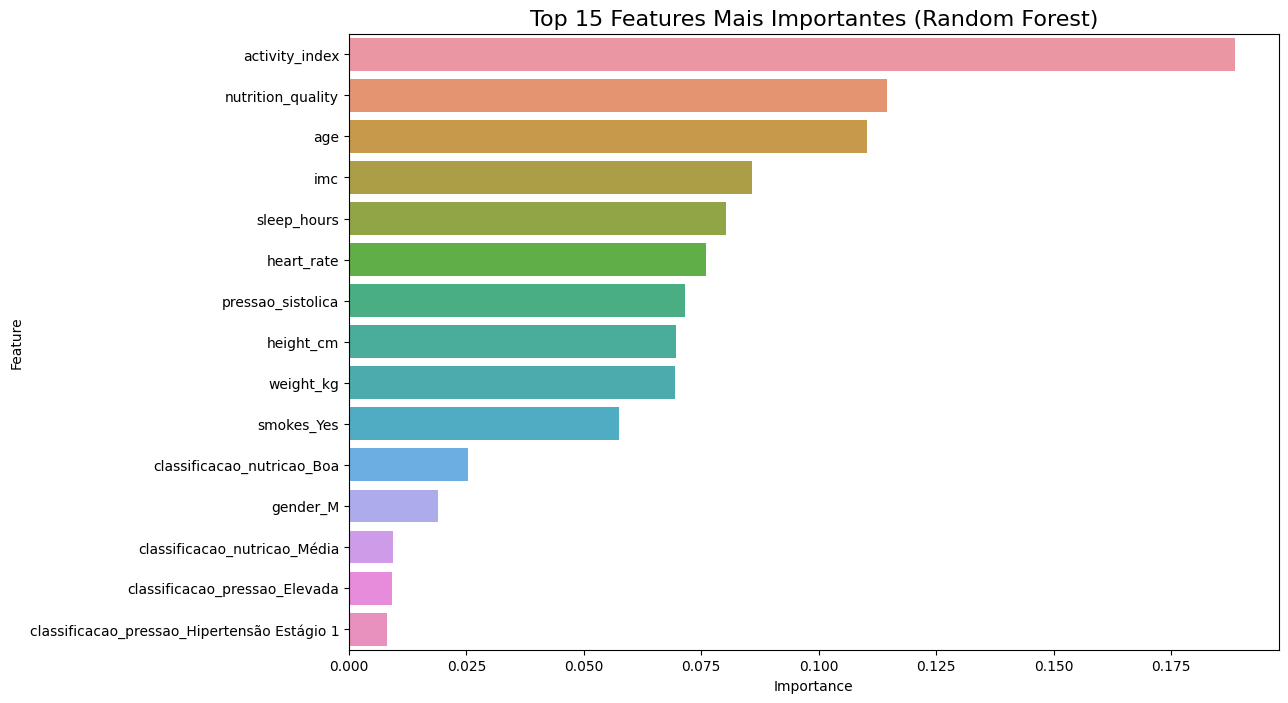

In [43]:
# ==============================================================================
#  IMPORTÂNCIA DAS FEATURES (RANDOM FOREST)
# ==============================================================================
print("\n" + "="*50)
print("FEATURES MAIS IMPORTANTES (RANDOM FOREST)")
print("="*50)

importances_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_rf)
plt.title('Top 15 Features Mais Importantes (Random Forest)', fontsize=16)
plt.show()

## Tentar ajustar o modelo para melhorar a performance

### Tratar o Desempenho Desigual das Classes

Acurácia do Random Forest: 0.7617

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.76      0.88      0.82       360
    Saudável       0.76      0.59      0.66       240

    accuracy                           0.76       600
   macro avg       0.76      0.73      0.74       600
weighted avg       0.76      0.76      0.75       600

Matriz de Confusão:


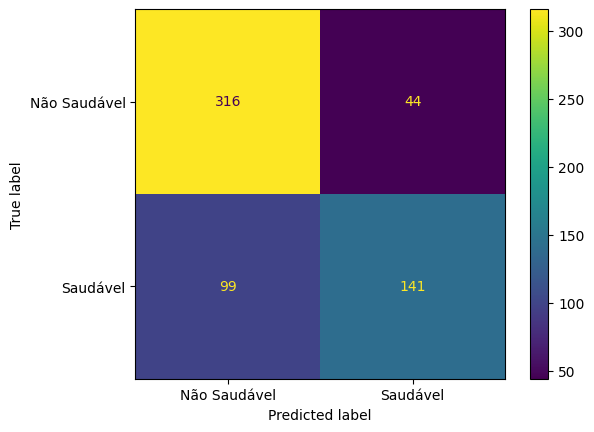

In [48]:
# Adicione o parâmetro class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  n_jobs=-1,
                                  class_weight='balanced') 
rf_model.fit(X_train, y_train)

# --- Previsão e Avaliação ---
y_pred_rf = rf_model.predict(X_test)

print(f"Acurácia do Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Saudável', 'Saudável']))

# --- Matriz de Confusão ---
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=['Não Saudável', 'Saudável'])
plt.show()

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Use seus dados de treino originais (X_train, y_train) já processados

# 1. Defina o "grid" de parâmetros que queremos testar
param_grid = {
    'n_estimators': [100, 200, 300, 500],       # Número de árvores
    'max_depth': [10, 20, 30, None],             # Profundidade máxima
    'min_samples_leaf': [1, 2, 4],               # Mínimo de amostras por folha
    'min_samples_split': [2, 5, 10],             # Mínimo para dividir um nó
    'max_features': ['sqrt', 'log2']             # Número de features por árvore
}

# 2. Crie o modelo base
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# 3. Configure a busca aleatória
# n_iter=50: testa 50 combinações aleatórias. cv=3: validação cruzada com 3 folds.
# scoring='f1_weighted': foca em otimizar o F1-score, que é bom para classes desbalanceadas.
rf_random_search = RandomizedSearchCV(estimator=rf_base,
                                      param_distributions=param_grid,
                                      n_iter=50,
                                      cv=3,
                                      verbose=2,
                                      random_state=42,
                                      scoring='f1_weighted')

# 4. Execute a busca (isso pode demorar alguns minutos)
print("\nIniciando a busca por hiperparâmetros...")
rf_random_search.fit(X_train, y_train)

# 5. Pegue o melhor modelo encontrado
best_rf_model = rf_random_search.best_estimator_
print("\nMelhores parâmetros encontrados:")
print(rf_random_search.best_params_)

# 6. Avalie o novo modelo otimizado
y_pred_best = best_rf_model.predict(X_test)
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_best, target_names=['Não Fit', 'Fit']))


Iniciando a busca por hiperparâmetros...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_sam

Novas features de interação criadas:
   activity_x_nutrition    age_x_imc  activity_div_age
0                9.4089  1575.484765          0.069649
1               27.9763  1894.727714          0.045571
2               16.6460  1285.264757          0.043191
3               22.7424   743.540214          0.111515
4               48.0585  1939.591837          0.079180
Dados divididos: 1400 para treino, 600 para teste.
Escalonamento das features numéricas concluído.

TREINANDO E AVALIANDO O RANDOM FOREST
Acurácia do Random Forest: 0.7717

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.78      0.87      0.82       360
    Saudável       0.76      0.63      0.69       240

    accuracy                           0.77       600
   macro avg       0.77      0.75      0.75       600
weighted avg       0.77      0.77      0.77       600

Matriz de Confusão:


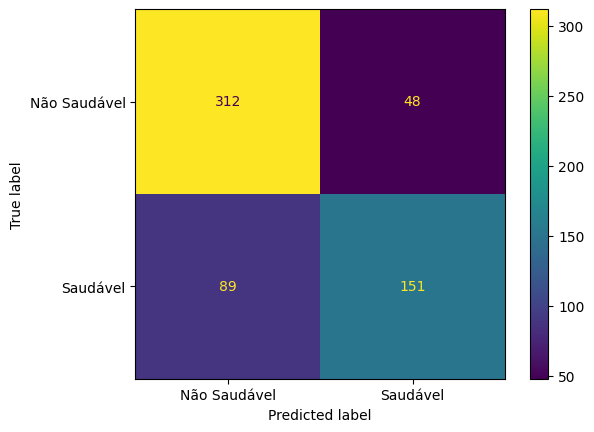

In [50]:
# Crie uma cópia do seu DataFrame de features X antes do pré-processamento
X_engineered = X.copy()

# --- Criando Features de Interação ---
# Multiplicamos as features mais importantes para capturar sinergias
X_engineered['activity_x_nutrition'] = X_engineered['activity_index'] * X_engineered['nutrition_quality']
X_engineered['age_x_imc'] = X_engineered['age'] * X_engineered['imc']
X_engineered['activity_div_age'] = X_engineered['activity_index'] / (X_engineered['age'] + 1) # +1 para evitar divisão por zero

print("Novas features de interação criadas:")
print(X_engineered[['activity_x_nutrition', 'age_x_imc', 'activity_div_age']].head())

# ==============================================================================
# 2. DIVISÃO EM DADOS DE TREINO E TESTE
# ==============================================================================
X_engineered_train, X_engineered_test, y_train, y_test = train_test_split(X_engineered, y, test_size=0.3, random_state=42, stratify=y)
print(f"Dados divididos: {len(X_engineered_train)} para treino, {len(X_engineered_test)} para teste.")

# ==============================================================================
# 3. ESCALONAMENTO DAS FEATURES NUMÉRICAS
# ==============================================================================
colunas_numericas = X_engineered.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_engineered_train[colunas_numericas] = scaler.fit_transform(X_engineered_train[colunas_numericas])
X_engineered_test[colunas_numericas] = scaler.transform(X_engineered_test[colunas_numericas])
print("Escalonamento das features numéricas concluído.")

# ==============================================================================
# 4. MODELO: RANDOM FOREST
# ==============================================================================
print("\n" + "="*50)
print("TREINANDO E AVALIANDO O RANDOM FOREST")
print("="*50)

# --- Treinamento ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_engineered_train, y_train)

# --- Previsão e Avaliação ---
y_pred_rf = rf_model.predict(X_engineered_test)

print(f"Acurácia do Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Saudável', 'Saudável']))

# --- Matriz de Confusão ---
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(rf_model, X_engineered_test, y_test, display_labels=['Não Saudável', 'Saudável'])
plt.show()



In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Use seus dados de treino originais (X_train, y_train) já processados

# 1. Defina o "grid" de parâmetros que queremos testar
param_grid = {
    'n_estimators': [100, 200, 300, 500],       # Número de árvores
    'max_depth': [10, 20, 30, None],             # Profundidade máxima
    'min_samples_leaf': [1, 2, 4],               # Mínimo de amostras por folha
    'min_samples_split': [2, 5, 10],             # Mínimo para dividir um nó
    'max_features': ['sqrt', 'log2']             # Número de features por árvore
}

# 2. Crie o modelo base
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# 3. Configure a busca aleatória
# n_iter=50: testa 50 combinações aleatórias. cv=3: validação cruzada com 3 folds.
# scoring='f1_weighted': foca em otimizar o F1-score, que é bom para classes desbalanceadas.
rf_random_search = RandomizedSearchCV(estimator=rf_base,
                                      param_distributions=param_grid,
                                      n_iter=50,
                                      cv=3,
                                      verbose=2,
                                      random_state=42,
                                      scoring='f1_weighted')

# 4. Execute a busca (isso pode demorar alguns minutos)
print("\nIniciando a busca por hiperparâmetros...")
rf_random_search.fit(X_engineered_train, y_train)

# 5. Pegue o melhor modelo encontrado
best_rf_model = rf_random_search.best_estimator_
print("\nMelhores parâmetros encontrados:")
print(rf_random_search.best_params_)

# 6. Avalie o novo modelo otimizado
y_pred_best = best_rf_model.predict(X_engineered_test)
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_best, target_names=['Não Fit', 'Fit']))


Iniciando a busca por hiperparâmetros...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_sam


Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

Não Saudável       0.80      0.85      0.82       360
    Saudável       0.75      0.68      0.71       240

    accuracy                           0.78       600
   macro avg       0.78      0.76      0.77       600
weighted avg       0.78      0.78      0.78       600

Matriz de Confusão:


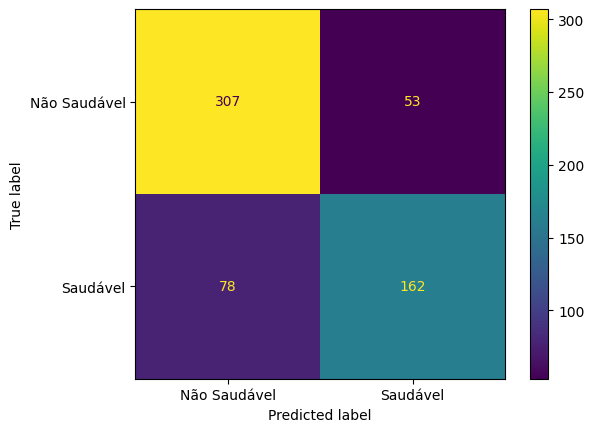

In [54]:
# 6. Avalie o novo modelo otimizado
y_pred_best = best_rf_model.predict(X_engineered_test)
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_best, target_names=['Não Saudável', 'Saudável']))

# --- Matriz de Confusão ---
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_engineered_test, y_test, display_labels=['Não Saudável', 'Saudável'])
plt.show()

## XGBOOST

Iniciando o pré-processamento para o modelo XGBoost...
One-Hot Encoding concluído.
Dados divididos: 1400 para treino, 600 para teste.
Escalonamento das features numéricas concluído.

TREINANDO E AVALIANDO O XGBOOST
Acurácia do XGBoost: 0.7433

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.76      0.84      0.80       360
    Saudável       0.71      0.60      0.65       240

    accuracy                           0.74       600
   macro avg       0.74      0.72      0.72       600
weighted avg       0.74      0.74      0.74       600

Matriz de Confusão:


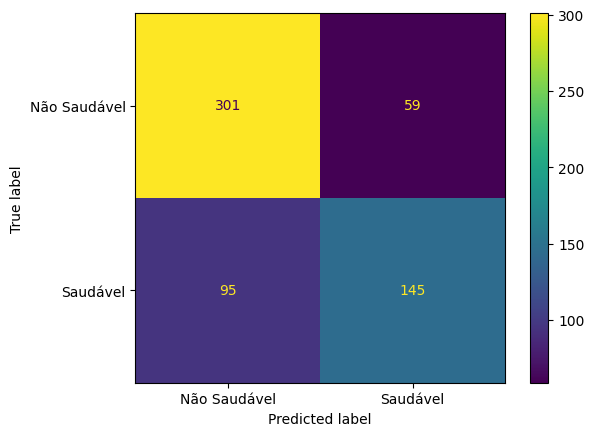

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# ==============================================================================
# 1. PREPARAÇÃO FINAL DOS DADOS (PRÉ-PROCESSAMENTO)
# ==============================================================================
print("Iniciando o pré-processamento para o modelo XGBoost...")

# --- Separar Features (X) e Alvo (y) ---
y = df['is_fit']
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- Codificação de Variáveis Categóricas (One-Hot Encoding) ---
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True, dtype=int)
print("One-Hot Encoding concluído.")

# ==============================================================================
# 2. DIVISÃO EM DADOS DE TREINO E TESTE
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

# ==============================================================================
# 3. ESCALONAMENTO DAS FEATURES NUMÉRICAS
# ==============================================================================
colunas_numericas = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])
print("Escalonamento das features numéricas concluído.")

# ==============================================================================
# 4. MODELO: XGBOOST
# ==============================================================================
print("\n" + "="*50)
print("TREINANDO E AVALIANDO O XGBOOST")
print("="*50)

# --- Treinamento ---
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# --- Previsão e Avaliação ---
y_pred_xgb = xgb_model.predict(X_test)

print(f"Acurácia do XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_xgb, target_names=['Não Saudável', 'Saudável']))

# --- Matriz de Confusão ---
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, display_labels=['Não Saudável', 'Saudável'])
plt.show()



FEATURES MAIS IMPORTANTES (XGBOOST)


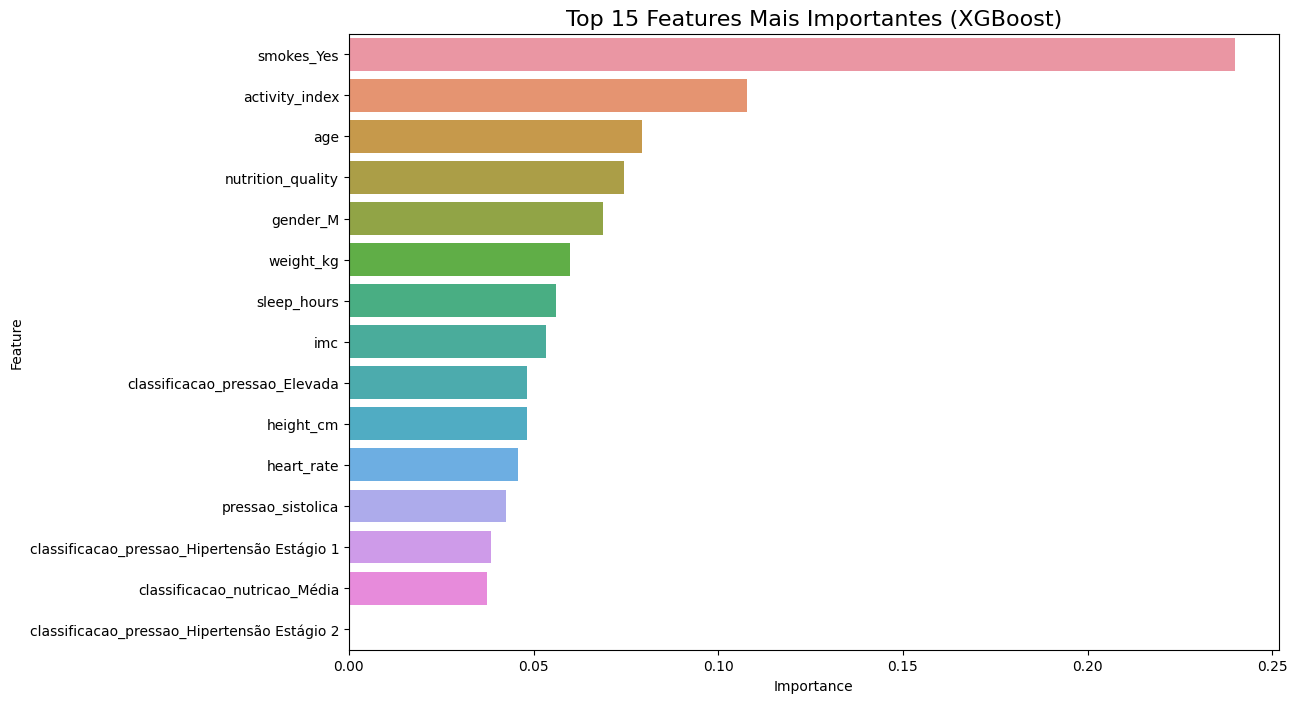

In [45]:
# ==============================================================================
#  IMPORTÂNCIA DAS FEATURES (XGBOOST)
# ==============================================================================
print("\n" + "="*50)
print("FEATURES MAIS IMPORTANTES (XGBOOST)")
print("="*50)

importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_xgb)
plt.title('Top 15 Features Mais Importantes (XGBoost)', fontsize=16)
plt.show()

Iniciando o pré-processamento...
Pré-processamento concluído.
Dados convertidos para tensores PyTorch.

INICIANDO O TREINAMENTO
Época [10/100], Perda (Loss): 0.4742
Época [20/100], Perda (Loss): 0.6717
Época [30/100], Perda (Loss): 0.4769
Época [40/100], Perda (Loss): 0.2409
Época [50/100], Perda (Loss): 0.3810
Época [60/100], Perda (Loss): 0.3138
Época [70/100], Perda (Loss): 0.2217
Época [80/100], Perda (Loss): 0.2406
Época [90/100], Perda (Loss): 0.3059
Época [100/100], Perda (Loss): 0.2828

AVALIANDO O MODELO FINAL
Acurácia da Rede Neural (PyTorch): 0.7483

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.77      0.82      0.80       360
    Saudável       0.71      0.64      0.67       240

    accuracy                           0.75       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.75      0.75      0.75       600

Matriz de Confusão:


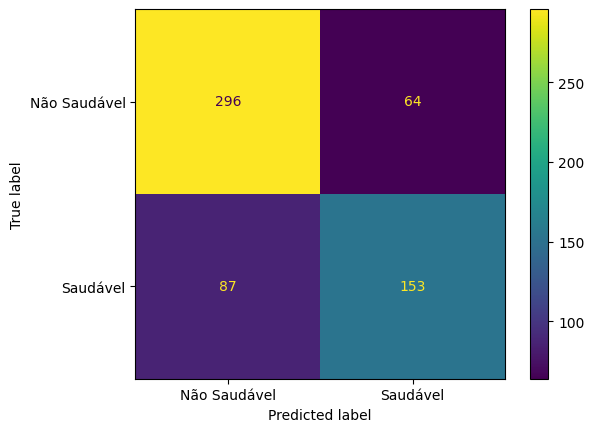

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Importando as bibliotecas do PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Garantir reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# ==============================================================================
# 1, 2, 3. PREPARAÇÃO, DIVISÃO E ESCALONAMENTO (Idêntico ao script anterior)
# ==============================================================================
print("Iniciando o pré-processamento...")

# --- Separar Features (X) e Alvo (y) ---
y = df['is_fit']
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- Codificação de Variáveis Categóricas (One-Hot Encoding) ---
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True, dtype=int)

# --- Divisão em Treino e Teste ---
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Escalonamento das Features ---
colunas_numericas = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

print("Pré-processamento concluído.")


# ==============================================================================
# 4. CONVERSÃO PARA TENSORES PYTORCH
# ==============================================================================
# PyTorch trabalha com seu próprio objeto: o Tensor.
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np.values, dtype=torch.float32).reshape(-1, 1) # Precisa ter a forma [n_amostras, 1]

X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np.values, dtype=torch.float32).reshape(-1, 1)

print("Dados convertidos para tensores PyTorch.")

# ==============================================================================
# 5. DEFINIÇÃO DA ARQUITETURA DA REDE (ESTILO PYTORCH)
# ==============================================================================
class ClassificadorBinario(nn.Module):
    def __init__(self, num_features):
        super(ClassificadorBinario, self).__init__()
        # Definimos as camadas sequencialmente
        self.layer_1 = nn.Linear(num_features, 32)
        self.layer_2 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        # Definimos como os dados fluem através das camadas
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.sigmoid(self.layer_out(x))
        return x

# ==============================================================================
# 6. INSTANCIAR MODELO, FUNÇÃO DE PERDA E OTIMIZADOR
# ==============================================================================
# Definindo hiperparâmetros
epochs = 100
batch_size = 32
learning_rate = 0.001

# Instanciando o modelo
input_features = X_train.shape[1]
model = ClassificadorBinario(num_features=input_features)

# Definindo a função de perda (Loss Function)
criterion = nn.BCELoss() # Binary Cross Entropy Loss

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Criando DataLoaders para gerenciar os batches
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# ==============================================================================
# 7. O LOOP DE TREINAMENTO (MANUAL)
# ==============================================================================
print("\n" + "="*50)
print("INICIANDO O TREINAMENTO")
print("="*50)

for epoch in range(epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # 1. Forward pass: obter as previsões do modelo
        outputs = model(data)
        
        # 2. Calcular a perda (o quão errado o modelo está)
        loss = criterion(outputs, targets)
        
        # 3. Backward pass: calcular os gradientes
        optimizer.zero_grad() # Zera os gradientes da iteração anterior
        loss.backward()      # Calcula os novos gradientes
        
        # 4. Atualizar os pesos
        optimizer.step()

    # Imprimir o progresso a cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda (Loss): {loss.item():.4f}')


# ==============================================================================
# 8. AVALIAÇÃO DO MODELO
# ==============================================================================
print("\n" + "="*50)
print("AVALIANDO O MODELO FINAL")
print("="*50)

model.eval() # Coloca o modelo em modo de avaliação
with torch.no_grad(): # Desabilita o cálculo de gradientes para economizar memória
    y_pred_proba = model(X_test)

# Converter as probabilidades para previsões (0 ou 1) e depois para um array numpy
y_pred = (y_pred_proba > 0.5).numpy()
y_test_np_flat = y_test.numpy() # Convertendo o y_test também para numpy

# Usar as ferramentas do Scikit-learn para avaliar
print(f"Acurácia da Rede Neural (PyTorch): {accuracy_score(y_test_np_flat, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test_np_flat, y_pred, target_names=['Não Saudável', 'Saudável']))

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test_np_flat, y_pred, display_labels=['Não Saudável', 'Saudável'])
plt.show()

Iniciando o pré-processamento...
Pré-processamento concluído.
Dados convertidos para tensores PyTorch.

INICIANDO O TREINAMENTO
Época [10/100], Perda (Loss): 0.5687
Época [20/100], Perda (Loss): 0.3945
Época [30/100], Perda (Loss): 0.5533
Época [40/100], Perda (Loss): 0.2703
Época [50/100], Perda (Loss): 0.3810
Época [60/100], Perda (Loss): 0.2720
Época [70/100], Perda (Loss): 0.3162
Época [80/100], Perda (Loss): 0.1075
Época [90/100], Perda (Loss): 0.2487
Época [100/100], Perda (Loss): 0.1274

AVALIANDO O MODELO FINAL
Acurácia da Rede Neural (PyTorch): 0.7367

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.78      0.79      0.78       360
    Saudável       0.67      0.66      0.67       240

    accuracy                           0.74       600
   macro avg       0.73      0.72      0.72       600
weighted avg       0.74      0.74      0.74       600

Matriz de Confusão:


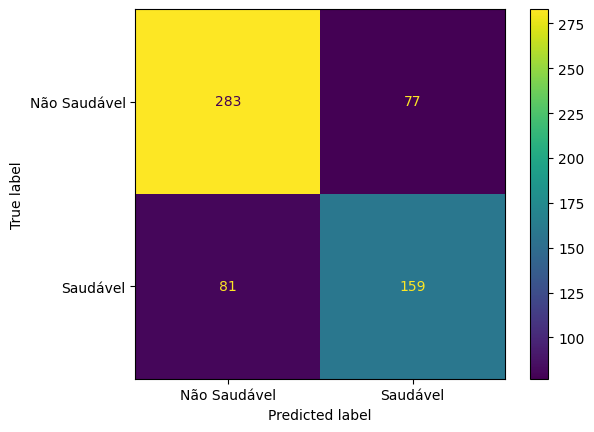

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Importando as bibliotecas do PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Garantir reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# ==============================================================================
# 1, 2, 3. PREPARAÇÃO, DIVISÃO E ESCALONAMENTO (Idêntico ao script anterior)
# ==============================================================================
print("Iniciando o pré-processamento...")

# --- Separar Features (X) e Alvo (y) ---
y = df['is_fit']
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- Codificação de Variáveis Categóricas (One-Hot Encoding) ---
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True, dtype=int)

# --- Divisão em Treino e Teste ---
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Escalonamento das Features ---
colunas_numericas = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

print("Pré-processamento concluído.")


# ==============================================================================
# 4. CONVERSÃO PARA TENSORES PYTORCH
# ==============================================================================
# PyTorch trabalha com seu próprio objeto: o Tensor.
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np.values, dtype=torch.float32).reshape(-1, 1) # Precisa ter a forma [n_amostras, 1]

X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np.values, dtype=torch.float32).reshape(-1, 1)

print("Dados convertidos para tensores PyTorch.")

# ==============================================================================
# 5. DEFINIÇÃO DA ARQUITETURA DA REDE (ESTILO PYTORCH)
# ==============================================================================
class ClassificadorBinario(nn.Module):
    def __init__(self, num_features):
        super(ClassificadorBinario, self).__init__()
        # Definimos as camadas sequencialmente
        self.layer_1 = nn.Linear(num_features, 64) # Antes era 32
        self.layer_2 = nn.Linear(64, 32)            # Antes era 16
        self.layer_out = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        # Definimos como os dados fluem através das camadas
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.sigmoid(self.layer_out(x))
        return x

# ==============================================================================
# 6. INSTANCIAR MODELO, FUNÇÃO DE PERDA E OTIMIZADOR
# ==============================================================================
# Definindo hiperparâmetros
epochs = 100
batch_size = 32
learning_rate = 0.001

# Instanciando o modelo
input_features = X_train.shape[1]
model = ClassificadorBinario(num_features=input_features)

# Definindo a função de perda (Loss Function)
criterion = nn.BCELoss() # Binary Cross Entropy Loss

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Criando DataLoaders para gerenciar os batches
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# ==============================================================================
# 7. O LOOP DE TREINAMENTO (MANUAL)
# ==============================================================================
print("\n" + "="*50)
print("INICIANDO O TREINAMENTO")
print("="*50)

for epoch in range(epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # 1. Forward pass: obter as previsões do modelo
        outputs = model(data)
        
        # 2. Calcular a perda (o quão errado o modelo está)
        loss = criterion(outputs, targets)
        
        # 3. Backward pass: calcular os gradientes
        optimizer.zero_grad() # Zera os gradientes da iteração anterior
        loss.backward()      # Calcula os novos gradientes
        
        # 4. Atualizar os pesos
        optimizer.step()

    # Imprimir o progresso a cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda (Loss): {loss.item():.4f}')


# ==============================================================================
# 8. AVALIAÇÃO DO MODELO
# ==============================================================================
print("\n" + "="*50)
print("AVALIANDO O MODELO FINAL")
print("="*50)

model.eval() # Coloca o modelo em modo de avaliação
with torch.no_grad(): # Desabilita o cálculo de gradientes para economizar memória
    y_pred_proba = model(X_test)

# Converter as probabilidades para previsões (0 ou 1) e depois para um array numpy
y_pred = (y_pred_proba > 0.5).numpy()
y_test_np_flat = y_test.numpy() # Convertendo o y_test também para numpy

# Usar as ferramentas do Scikit-learn para avaliar
print(f"Acurácia da Rede Neural (PyTorch): {accuracy_score(y_test_np_flat, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test_np_flat, y_pred, target_names=['Não Saudável', 'Saudável']))

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test_np_flat, y_pred, display_labels=['Não Saudável', 'Saudável'])
plt.show()

## Regularização para Combater o Overfitting

Iniciando o pré-processamento...
Pré-processamento concluído.
Dados convertidos para tensores PyTorch.

INICIANDO O TREINAMENTO
Época [10/100], Perda (Loss): 0.4403
Época [20/100], Perda (Loss): 0.5094
Época [30/100], Perda (Loss): 0.4314
Época [40/100], Perda (Loss): 0.5315
Época [50/100], Perda (Loss): 0.6886
Época [60/100], Perda (Loss): 0.4213
Época [70/100], Perda (Loss): 0.6119
Época [80/100], Perda (Loss): 0.5820
Época [90/100], Perda (Loss): 0.3975
Época [100/100], Perda (Loss): 0.4184

AVALIANDO O MODELO FINAL
Acurácia da Rede Neural (PyTorch): 0.7883

Relatório de Classificação:
              precision    recall  f1-score   support

Não Saudável       0.80      0.86      0.83       360
    Saudável       0.77      0.68      0.72       240

    accuracy                           0.79       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.79      0.79      0.79       600

Matriz de Confusão:


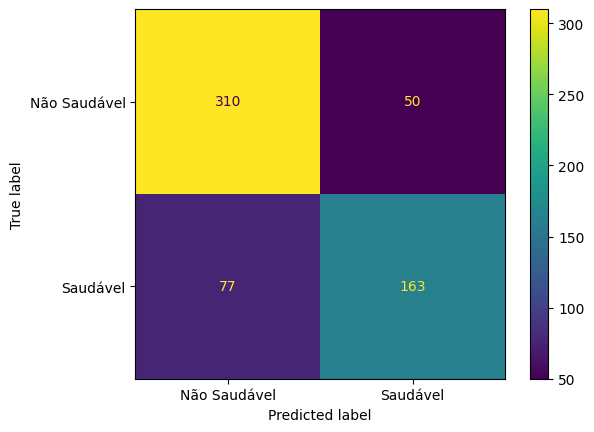

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Importando as bibliotecas do PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Garantir reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# ==============================================================================
# 1, 2, 3. PREPARAÇÃO, DIVISÃO E ESCALONAMENTO (Idêntico ao script anterior)
# ==============================================================================
print("Iniciando o pré-processamento...")

# --- Separar Features (X) e Alvo (y) ---
y = df['is_fit']
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- Codificação de Variáveis Categóricas (One-Hot Encoding) ---
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True, dtype=int)

# --- Divisão em Treino e Teste ---
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Escalonamento das Features ---
colunas_numericas = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

print("Pré-processamento concluído.")


# ==============================================================================
# 4. CONVERSÃO PARA TENSORES PYTORCH
# ==============================================================================
# PyTorch trabalha com seu próprio objeto: o Tensor.
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np.values, dtype=torch.float32).reshape(-1, 1) # Precisa ter a forma [n_amostras, 1]

X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np.values, dtype=torch.float32).reshape(-1, 1)

print("Dados convertidos para tensores PyTorch.")

# ==============================================================================
# 5. DEFINIÇÃO DA ARQUITETURA DA REDE (ESTILO PYTORCH)
# ==============================================================================
class ClassificadorBinario(nn.Module):
    def __init__(self, num_features):
        super(ClassificadorBinario, self).__init__()
        self.layer_1 = nn.Linear(num_features, 32)
        self.layer_2 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.5) # Desliga 50% dos neurônios

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.dropout(x) # Aplica dropout após a primeira camada
        x = self.relu(self.layer_2(x))
        x = self.dropout(x) # Aplica dropout após a segunda camada
        x = self.sigmoid(self.layer_out(x))
        return x

# ==============================================================================
# 6. INSTANCIAR MODELO, FUNÇÃO DE PERDA E OTIMIZADOR
# ==============================================================================
# Definindo hiperparâmetros
epochs = 100
batch_size = 32
learning_rate = 0.001

# Instanciando o modelo
input_features = X_train.shape[1]
model = ClassificadorBinario(num_features=input_features)

# Definindo a função de perda (Loss Function)
criterion = nn.BCELoss() # Binary Cross Entropy Loss

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Criando DataLoaders para gerenciar os batches
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# ==============================================================================
# 7. O LOOP DE TREINAMENTO (MANUAL)
# ==============================================================================
print("\n" + "="*50)
print("INICIANDO O TREINAMENTO")
print("="*50)

for epoch in range(epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # 1. Forward pass: obter as previsões do modelo
        outputs = model(data)
        
        # 2. Calcular a perda (o quão errado o modelo está)
        loss = criterion(outputs, targets)
        
        # 3. Backward pass: calcular os gradientes
        optimizer.zero_grad() # Zera os gradientes da iteração anterior
        loss.backward()      # Calcula os novos gradientes
        
        # 4. Atualizar os pesos
        optimizer.step()

    # Imprimir o progresso a cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda (Loss): {loss.item():.4f}')


# ==============================================================================
# 8. AVALIAÇÃO DO MODELO
# ==============================================================================
print("\n" + "="*50)
print("AVALIANDO O MODELO FINAL")
print("="*50)

model.eval() # Coloca o modelo em modo de avaliação
with torch.no_grad(): # Desabilita o cálculo de gradientes para economizar memória
    y_pred_proba = model(X_test)

# Converter as probabilidades para previsões (0 ou 1) e depois para um array numpy
y_pred = (y_pred_proba > 0.5).numpy()
y_test_np_flat = y_test.numpy() # Convertendo o y_test também para numpy

# Usar as ferramentas do Scikit-learn para avaliar
print(f"Acurácia da Rede Neural (PyTorch): {accuracy_score(y_test_np_flat, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test_np_flat, y_pred, target_names=['Não Saudável', 'Saudável']))

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test_np_flat, y_pred, display_labels=['Não Saudável', 'Saudável'])
plt.show()

## Ajustar os Hiperparâmetros de Treinamento

Iniciando o pré-processamento...
Pré-processamento concluído.
Dados convertidos para tensores PyTorch.

INICIANDO O TREINAMENTO
Época [10/200], Perda (Loss): 0.5170
Época [20/200], Perda (Loss): 0.5177
Época [30/200], Perda (Loss): 0.4534
Época [40/200], Perda (Loss): 0.5275
Época [50/200], Perda (Loss): 0.6855
Época [60/200], Perda (Loss): 0.4680
Época [70/200], Perda (Loss): 0.6053
Época [80/200], Perda (Loss): 0.5927
Época [90/200], Perda (Loss): 0.4204
Época [100/200], Perda (Loss): 0.4126
Época [110/200], Perda (Loss): 0.5110
Época [120/200], Perda (Loss): 0.6079
Época [130/200], Perda (Loss): 0.3194
Época [140/200], Perda (Loss): 0.4285
Época [150/200], Perda (Loss): 0.4047
Época [160/200], Perda (Loss): 0.4361
Época [170/200], Perda (Loss): 0.5859
Época [180/200], Perda (Loss): 0.4226
Época [190/200], Perda (Loss): 0.7276
Época [200/200], Perda (Loss): 0.3938

AVALIANDO O MODELO FINAL
Acurácia da Rede Neural (PyTorch): 0.7917

Relatório de Classificação:
              precision 

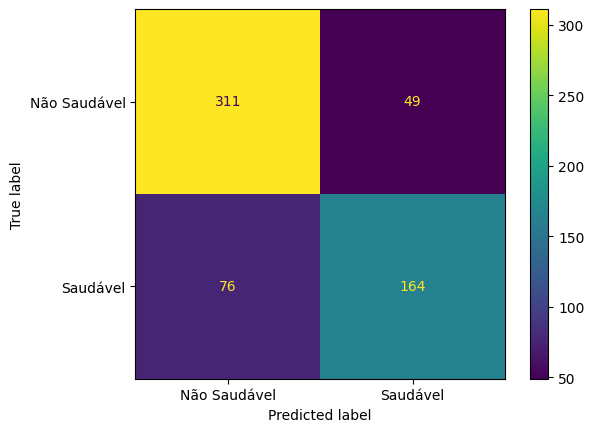

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Importando as bibliotecas do PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Garantir reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# ==============================================================================
# 1, 2, 3. PREPARAÇÃO, DIVISÃO E ESCALONAMENTO (Idêntico ao script anterior)
# ==============================================================================
print("Iniciando o pré-processamento...")

# --- Separar Features (X) e Alvo (y) ---
y = df['is_fit']
X = df.drop(columns=['is_fit', 'estado_fisico'])

# --- Codificação de Variáveis Categóricas (One-Hot Encoding) ---
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True, dtype=int)

# --- Divisão em Treino e Teste ---
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Escalonamento das Features ---
colunas_numericas = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

print("Pré-processamento concluído.")


# ==============================================================================
# 4. CONVERSÃO PARA TENSORES PYTORCH
# ==============================================================================
# PyTorch trabalha com seu próprio objeto: o Tensor.
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np.values, dtype=torch.float32).reshape(-1, 1) # Precisa ter a forma [n_amostras, 1]

X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np.values, dtype=torch.float32).reshape(-1, 1)

print("Dados convertidos para tensores PyTorch.")

# ==============================================================================
# 5. DEFINIÇÃO DA ARQUITETURA DA REDE (ESTILO PYTORCH)
# ==============================================================================
class ClassificadorBinario(nn.Module):
    def __init__(self, num_features):
        super(ClassificadorBinario, self).__init__()
        self.layer_1 = nn.Linear(num_features, 32)
        self.layer_2 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.5) # Desliga 50% dos neurônios

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.dropout(x) # Aplica dropout após a primeira camada
        x = self.relu(self.layer_2(x))
        x = self.dropout(x) # Aplica dropout após a segunda camada
        x = self.sigmoid(self.layer_out(x))
        return x

# ==============================================================================
# 6. INSTANCIAR MODELO, FUNÇÃO DE PERDA E OTIMIZADOR
# ==============================================================================
# Definindo hiperparâmetros
epochs = 200
batch_size = 32
learning_rate = 0.001

# Instanciando o modelo
input_features = X_train.shape[1]
model = ClassificadorBinario(num_features=input_features)

# Definindo a função de perda (Loss Function)
criterion = nn.BCELoss() # Binary Cross Entropy Loss

# Definindo o otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

# Criando DataLoaders para gerenciar os batches
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# ==============================================================================
# 7. O LOOP DE TREINAMENTO (MANUAL)
# ==============================================================================
print("\n" + "="*50)
print("INICIANDO O TREINAMENTO")
print("="*50)

for epoch in range(epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # 1. Forward pass: obter as previsões do modelo
        outputs = model(data)
        
        # 2. Calcular a perda (o quão errado o modelo está)
        loss = criterion(outputs, targets)
        
        # 3. Backward pass: calcular os gradientes
        optimizer.zero_grad() # Zera os gradientes da iteração anterior
        loss.backward()      # Calcula os novos gradientes
        
        # 4. Atualizar os pesos
        optimizer.step()

    # Imprimir o progresso a cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda (Loss): {loss.item():.4f}')


# ==============================================================================
# 8. AVALIAÇÃO DO MODELO
# ==============================================================================
print("\n" + "="*50)
print("AVALIANDO O MODELO FINAL")
print("="*50)

model.eval() # Coloca o modelo em modo de avaliação
with torch.no_grad(): # Desabilita o cálculo de gradientes para economizar memória
    y_pred_proba = model(X_test)

# Converter as probabilidades para previsões (0 ou 1) e depois para um array numpy
y_pred = (y_pred_proba > 0.5).numpy()
y_test_np_flat = y_test.numpy() # Convertendo o y_test também para numpy

# Usar as ferramentas do Scikit-learn para avaliar
print(f"Acurácia da Rede Neural (PyTorch): {accuracy_score(y_test_np_flat, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test_np_flat, y_pred, target_names=['Não Saudável', 'Saudável']))

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test_np_flat, y_pred, display_labels=['Não Saudável', 'Saudável'])
plt.show()

## Validação cruzada

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Supondo que 'X_scaled' e 'y' são seus dados finais pré-processados
# Use o DataFrame completo antes do train_test_split para a validação cruzada

# Crie uma instância do seu melhor modelo (ex: Random Forest otimizado)
modelo_final = RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42)

# Execute a validação cruzada com 5 folds
# 'cv=5' especifica 5 dobras
# 'scoring' especifica a métrica (usaremos 'f1_weighted' que é ótima para o nosso caso)
scores = cross_val_score(modelo_final, X, y, cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Scores de cada rodada (Fold): {scores}")
print(f"Média do F1-Score (Validação Cruzada): {scores.mean():.4f}")
print(f"Desvio Padrão do F1-Score: {scores.std():.4f}")

Scores de cada rodada (Fold): [0.75975659 0.75212639 0.72449775 0.74340834 0.77115229]
Média do F1-Score (Validação Cruzada): 0.7502
Desvio Padrão do F1-Score: 0.0158
